Step 1: Load the Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Load the dataset
file_path = '../data/prepared_data1.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Inspect the first few rows of the data
print(data.head())

# Check for missing values in the dataset
print(data.isnull().sum())


        Date      Time_Vector  Aboard  Fatalities  Survives
0  9/17/1908  [0, 0, 1, 0, 0]     2.0         1.0         1
1   9/7/1909  [0, 0, 0, 0, 1]     1.0         1.0         0
2  7/12/1912  [1, 0, 0, 0, 0]     5.0         5.0         0
3   8/6/1913  [0, 0, 0, 0, 1]     1.0         1.0         0
4   9/9/1913  [0, 0, 1, 0, 0]    20.0        14.0         1
Date            0
Time_Vector     0
Aboard         18
Fatalities      8
Survives        0
dtype: int64


Step 2: Handle Missing Values


In [32]:
# Fill missing values in numeric columns (Aboard, Fatalities) with the median of each column
data['Aboard'] = data['Aboard'].fillna(data['Aboard'].median())
data['Fatalities'] = data['Fatalities'].fillna(data['Fatalities'].median())

# Check if there are any other missing values
print(data.isnull().sum())


Date           0
Time_Vector    0
Aboard         0
Fatalities     0
Survives       0
dtype: int64


Step 3: Process Date Column


In [33]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y', errors='coerce')

# Extract 'Year', 'Month', and 'Day_of_Week' from 'Date'
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day_of_Week'] = data['Date'].dt.dayofweek  # 0=Monday, 6=Sunday

# Drop the original 'Date' column as it's no longer needed
data = data.drop(columns=['Date'])

# Check the changes
print(data[['Year', 'Month', 'Day_of_Week']].head())


   Year  Month  Day_of_Week
0  1908      9            3
1  1909      9            1
2  1912      7            4
3  1913      8            2
4  1913      9            1


In [21]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y', errors='coerce')

# Extract year, month, and day of the week from 'Date'
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day_of_Week'] = data['Date'].dt.dayofweek  # 0=Monday, 6=Sunday

# Drop the original 'Date' column as it's no longer needed
data = data.drop(columns=['Date'])

# Inspect the changes
print(data[['Year', 'Month', 'Day_of_Week']].head())

   Year  Month  Day_of_Week
0  1908      9            3
1  1909      9            1
2  1912      7            4
3  1913      8            2
4  1913      9            1


Step 4: Process Time_Vector Column


In [34]:
# Convert 'Time_Vector' from string representation to a list of integers
data['Time_Vector'] = data['Time_Vector'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Expand the 'Time_Vector' into separate columns
time_vector_columns = ['Time_Morning', 'Time_Afternoon', 'Time_Evening', 'Time_Night', 'Time_Unknown']
time_vectors = pd.DataFrame(data['Time_Vector'].tolist(), columns=time_vector_columns)

# Concatenate the time vector columns with the original data and drop the 'Time_Vector' column
data = pd.concat([data, time_vectors], axis=1).drop(columns=['Time_Vector'])

# Check the new columns
print(data[time_vector_columns].head())


   Time_Morning  Time_Afternoon  Time_Evening  Time_Night  Time_Unknown
0             0               0             1           0             0
1             0               0             0           0             1
2             1               0             0           0             0
3             0               0             0           0             1
4             0               0             1           0             0


Step 5: Define Features and Target


In [35]:
# Define features (X) and target variable (y)
X = data.drop(columns=['Survives'])  # Features (everything except 'Survives')
y = data['Survives']  # Target variable ('Survives')


Step 6: Split the Data into Training and Test Sets


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the split sizes
print(f"Training data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")


Training data size: (3998, 10)
Testing data size: (1000, 10)


Step 7: Train the Model


In [ ]:
# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


Step 8: Evaluate the Model


In [ ]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       649
           1       0.96      0.75      0.84       351

    accuracy                           0.90      1000
   macro avg       0.92      0.87      0.88      1000
weighted avg       0.91      0.90      0.90      1000

Confusion Matrix:
[[639  10]
 [ 89 262]]


Step 9: Feature Importance


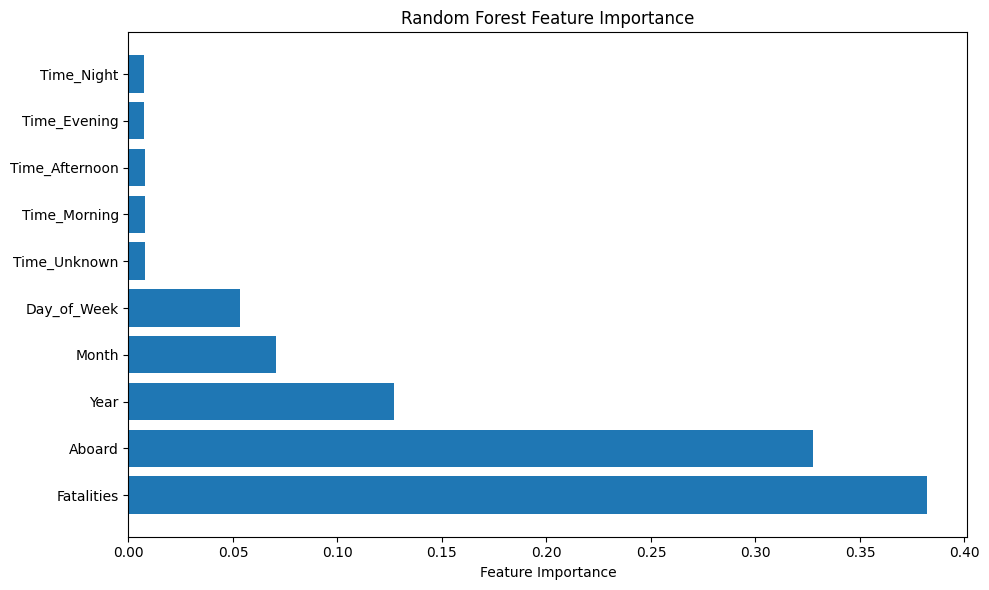

In [ ]:
# Get feature importance from the model
feature_importance = model.feature_importances_

# Get the feature names after one-hot encoding
feature_names = X.columns

# Plot the feature importance
plt.figure(figsize=(10, 6))
indices = np.argsort(feature_importance)[::-1]
plt.barh(range(len(feature_importance)), feature_importance[indices], align="center")
plt.yticks(range(len(feature_importance)), np.array(feature_names)[indices])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()
